In [10]:
DATA_DIR = "../data/laks"

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_clone_snvs = pd.read_csv(f"{DATA_DIR}/ov2295_clone_snvs.csv.gz", low_memory=False)
df_clone_snvs

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom
0,1,985349,G,A,A,18,0,18,0,0,0
1,1,985349,G,A,B,19,0,19,0,0,0
2,1,985349,G,A,C,14,0,14,0,0,0
3,1,985349,G,A,D,18,0,18,0,0,0
4,1,985349,G,A,E,6,10,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0
126608,X,154563943,T,A,F,0,10,14,1,1,0
126609,X,154563943,T,A,G,22,0,22,0,0,0
126610,X,154563943,T,A,H,10,0,10,0,0,0


In [16]:
df_clone_cn = pd.read_csv(f"{DATA_DIR}/ov2295_clone_cn.csv.gz")
df_clone_cn

,clone_id,chr,start,end,copy,total_cn,minor_cn,major_cn
0,E,1,1,500000,NaN,4,0,4
1,E,1,500001,1000000,NaN,4,0,4
2,E,1,1000001,1500000,4.906717,4,0,4
3,E,1,1500001,2000000,3.793922,4,0,4
4,E,1,2000001,2500000,5.130191,4,0,4
...,...,...,...,...,...,...,...,...
55849,F,Y,57000001,57500000,NaN,0,0,0
55850,F,Y,57500001,58000000,NaN,0,0,0
55851,F,Y,58000001,58500000,NaN,0,0,0
55852,F,Y,58500001,59000000,NaN,0,0,0


In [20]:
# All bins are of the same size
print((df_clone_cn["end"] - df_clone_cn["start"] + 1).unique())

bin_size = (df_clone_cn["end"] - df_clone_cn["start"] + 1).unique()[0]

[500000]


In [26]:
df_clone_snvs["bin_start"] = df_clone_snvs["coord"] // bin_size * bin_size + 1
df_clone_snvs_cn = pd.merge(
    df_clone_snvs,
    df_clone_cn,
    left_on=["clone_id", "chrom", "bin_start"],
    right_on=["clone_id", "chr", "start"],
    how='left',
)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn
0,1,985349,G,A,A,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2
1,1,985349,G,A,B,19,0,19,0,0,0,500001,1,500001,1000000,NaN,2,0,2
2,1,985349,G,A,C,14,0,14,0,0,0,500001,1,500001,1000000,NaN,2,0,2
3,1,985349,G,A,D,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2
4,1,985349,G,A,E,6,10,23,1,1,0,500001,1,500001,1000000,NaN,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,154500001,X,154500001,155000000,1.604020,2,0,2
126608,X,154563943,T,A,F,0,10,14,1,1,0,154500001,X,154500001,155000000,1.573432,2,0,2
126609,X,154563943,T,A,G,22,0,22,0,0,0,154500001,X,154500001,155000000,1.524319,2,0,2
126610,X,154563943,T,A,H,10,0,10,0,0,0,154500001,X,154500001,155000000,1.551737,2,0,2


## Pooling

In [27]:
from sklearn.cluster import SpectralBiclustering

In [33]:
df = df_clone_snvs_cn
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"].astype(str) + ":" + df["alt"].astype(str)
df_clone_snvs_cn

,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom,bin_start,chr,start,end,copy,total_cn,minor_cn,major_cn,mutation
0,1,985349,G,A,A,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
1,1,985349,G,A,B,19,0,19,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
2,1,985349,G,A,C,14,0,14,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
3,1,985349,G,A,D,18,0,18,0,0,0,500001,1,500001,1000000,NaN,2,0,2,1:985349:G:A
4,1,985349,G,A,E,6,10,23,1,1,0,500001,1,500001,1000000,NaN,4,0,4,1:985349:G:A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0,154500001,X,154500001,155000000,1.604020,2,0,2,X:154563943:T:A
126608,X,154563943,T,A,F,0,10,14,1,1,0,154500001,X,154500001,155000000,1.573432,2,0,2,X:154563943:T:A
126609,X,154563943,T,A,G,22,0,22,0,0,0,154500001,X,154500001,155000000,1.524319,2,0,2,X:154563943:T:A
126610,X,154563943,T,A,H,10,0,10,0,0,0,154500001,X,154500001,155000000,1.551737,2,0,2,X:154563943:T:A


In [30]:
total_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='total_counts',
    aggfunc='sum',
    fill_value=0
)
total_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,10,21,5,24,24,6,24,24,14,5,...,8,11,6,23,7,11,8,1,20,3
B,6,13,7,16,30,5,9,10,12,6,...,7,12,7,5,3,9,6,3,8,9
C,13,11,6,8,23,4,15,15,5,5,...,6,12,4,8,4,11,5,4,6,10
D,13,15,5,26,36,10,19,19,11,9,...,4,8,8,7,18,20,8,7,12,7
E,27,35,27,51,54,26,64,64,66,22,...,15,26,21,18,30,27,13,21,20,28
F,16,18,15,30,24,21,31,31,29,12,...,11,12,2,16,12,8,7,13,7,12
G,18,16,16,42,45,23,38,38,52,10,...,12,12,9,13,20,19,7,17,11,22
H,14,18,16,22,20,13,23,23,21,13,...,13,5,8,6,5,11,8,10,7,5
I,24,19,19,32,26,21,31,32,30,14,...,13,18,7,10,23,8,8,9,10,10


In [ ]:
copy_number_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='alt_counts',
    aggfunc='sum',
    fill_value=0
)
copy_number_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0,0,5,0,10,0,0,0,0,5,...,0,0,0,10,7,0,0,1,0,0
B,0,0,7,0,10,0,0,0,0,6,...,0,0,0,4,3,0,0,3,0,0
C,0,0,6,0,0,0,1,0,0,5,...,0,0,0,0,4,0,5,4,0,0
D,0,0,5,0,0,0,0,0,0,9,...,0,0,0,0,10,0,8,7,0,0
E,10,10,9,10,0,7,10,10,10,10,...,0,10,1,0,10,0,0,10,10,0
F,4,10,10,10,0,1,10,10,0,5,...,0,0,0,0,10,0,0,10,7,0
G,0,0,7,0,0,0,0,0,0,3,...,10,0,9,0,10,8,0,10,0,10
H,0,0,9,0,0,0,1,0,0,8,...,10,0,8,0,5,5,0,10,0,5
I,0,0,10,0,0,0,0,0,0,7,...,10,0,7,0,10,1,0,9,0,10


In [ ]:
vaf_table = copy_number_table.div(total_table).replace(np.nan, 0)
vaf_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.00000,0.000000,1.000000,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.00000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,0.37037,0.285714,0.333333,0.196078,0.000000,0.269231,0.156250,0.156250,0.151515,0.454545,...,0.000000,0.384615,0.047619,0.000000,0.333333,0.000000,0.0,0.476190,0.5,0.000000
F,0.25000,0.555556,0.666667,0.333333,0.000000,0.047619,0.322581,0.322581,0.000000,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.0,0.769231,1.0,0.000000
G,0.00000,0.000000,0.437500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.833333,0.000000,1.000000,0.000000,0.500000,0.421053,0.0,0.588235,0.0,0.454545
H,0.00000,0.000000,0.562500,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.615385,...,0.769231,0.000000,1.000000,0.000000,1.000000,0.454545,0.0,1.000000,0.0,1.000000
I,0.00000,0.000000,0.526316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.769231,0.000000,1.000000,0.000000,0.434783,0.125000,0.0,1.000000,0.0,1.000000


In [36]:
copy_number_table = df_clone_snvs_cn.pivot_table(
    index='clone_id',
    columns='mutation',
    values='total_cn',
    aggfunc='mean',
    fill_value=0
).astype(int)
copy_number_table

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
B,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
D,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
F,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
G,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
H,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
I,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2


In [40]:
F = (vaf_table * copy_number_table).clip(upper=1)
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [44]:
is_subclonal = (F > 0) & (F < 1)

subclonal_counts = is_subclonal.sum(axis=0)

subclonal_counts

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:98278474:C:A      3
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 14068, dtype: int64

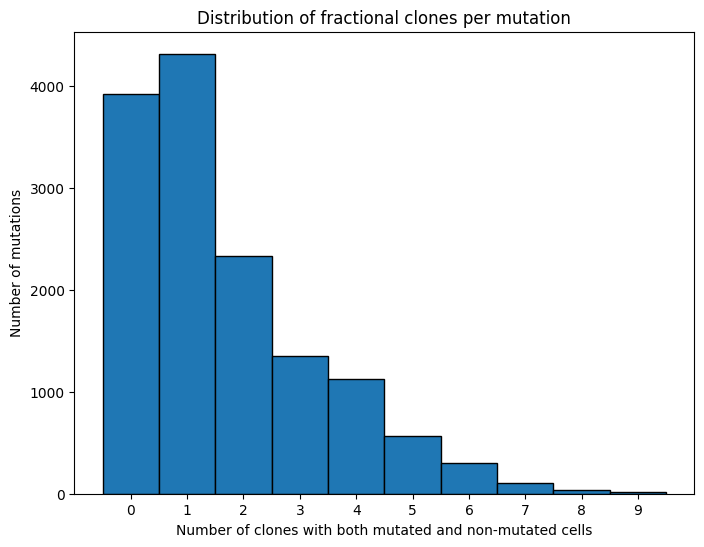

In [45]:
plt.figure(figsize=(8,6))
plt.hist(subclonal_counts, bins=range(subclonal_counts.max()+2), edgecolor="black", align="left")
plt.xlabel("Number of clones with both mutated and non-mutated cells")
plt.ylabel("Number of mutations")
plt.title("Distribution of fractional clones per mutation")
plt.xticks(range(subclonal_counts.max()+1))
plt.show()

In [46]:
distribution_of_subclonal_value_counts = subclonal_counts.value_counts().sort_index()
distribution_of_subclonal_value_counts

0    3921
1    4315
2    2331
3    1347
4    1128
5     569
6     302
7     109
8      32
9      14
Name: count, dtype: int64

In [47]:
is_mutation_with_atmost_1_subclonal_cluster = subclonal_counts[subclonal_counts <= 1]
is_mutation_with_atmost_1_subclonal_cluster

mutation
10:100129846:C:A    0
10:100185101:A:G    0
10:100209326:T:C    0
10:100283942:C:T    1
10:10086005:G:T     1
                   ..
X:97564955:T:C      1
X:98452192:T:C      0
X:98700894:C:T      1
X:99136386:C:T      0
X:99571629:G:T      1
Length: 8236, dtype: int64

In [48]:
mutations_to_keep = is_mutation_with_atmost_1_subclonal_cluster.index
F_cononical = F.loc[:, F.columns.isin(mutations_to_keep)]
F_cononical

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,10:102329766:C:A,...,X:94344991:T:G,X:96387929:A:T,X:96987846:A:C,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625,0.606061,1.0,1.0,...,1.0,0.0,0.933333,0.0,0.769231,0.095238,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000,0.000000,1.0,1.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000


In [50]:
from sklearn.cluster import SpectralBiclustering
import numpy as np
import seaborn as sns


def plot_spectral_clustering(F):
    model = SpectralBiclustering(n_clusters=7, method='log', random_state=0)
    model.fit(F.values)

    frac_biclust = F.iloc[np.argsort(model.row_labels_)]
    frac_biclust = frac_biclust.iloc[:, np.argsort(model.column_labels_)]

    sns.heatmap(frac_biclust, cmap='coolwarm')

    # Get where the cluster boundaries are
    row_order = np.argsort(model.row_labels_)
    col_order = np.argsort(model.column_labels_)

    row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
    col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

    row_lines = np.cumsum(row_counts)[:-1]
    col_lines = np.cumsum(col_counts)[:-1]

    # Plot with boundaries
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)

    # Draw horizontal lines
    for r in row_lines:
        ax.axhline(r, color='white', lw=2)

    # Draw vertical lines
    for c in col_lines:
        ax.axvline(c, color='white', lw=2)

    plt.title("Spectral Biclustering of CF")
    plt.xlabel("Mutations")
    plt.ylabel("CN Cluster IDs")
    plt.show()

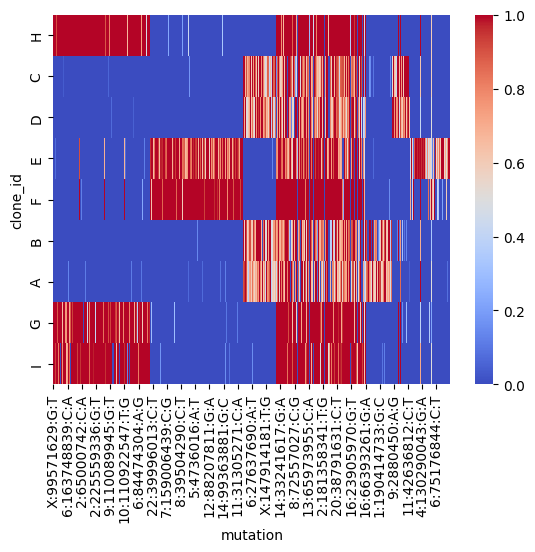

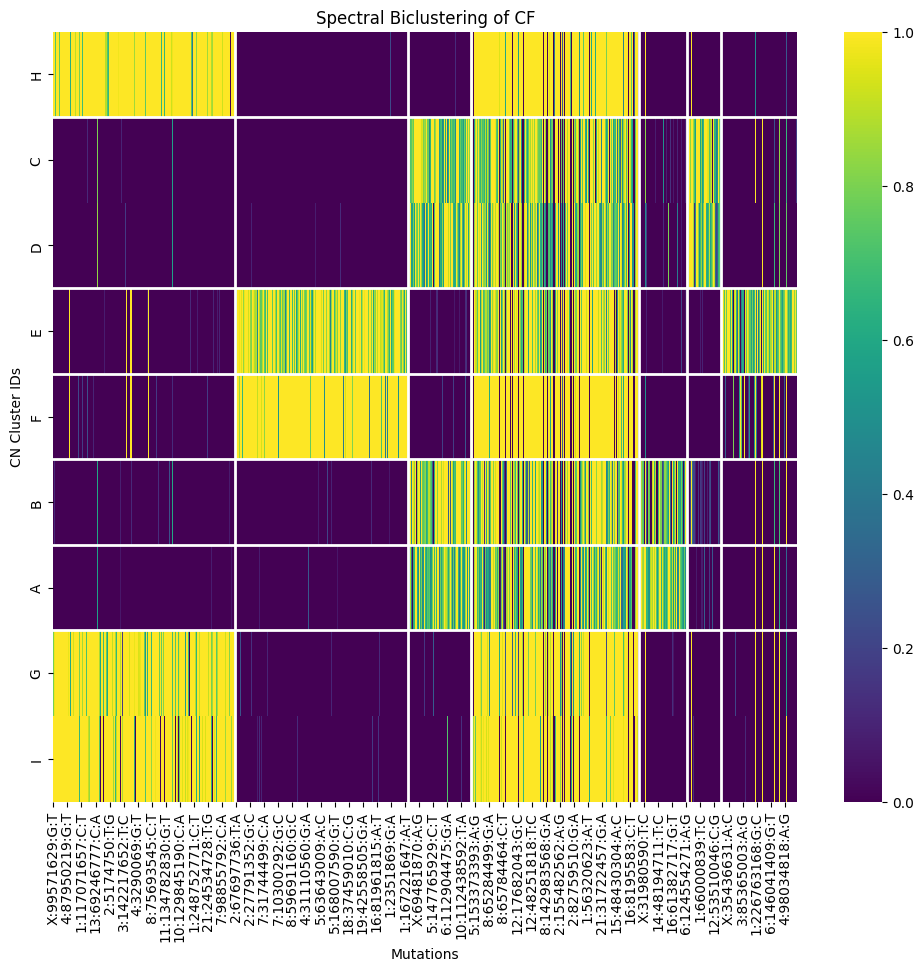

In [51]:
plot_spectral_clustering(F)

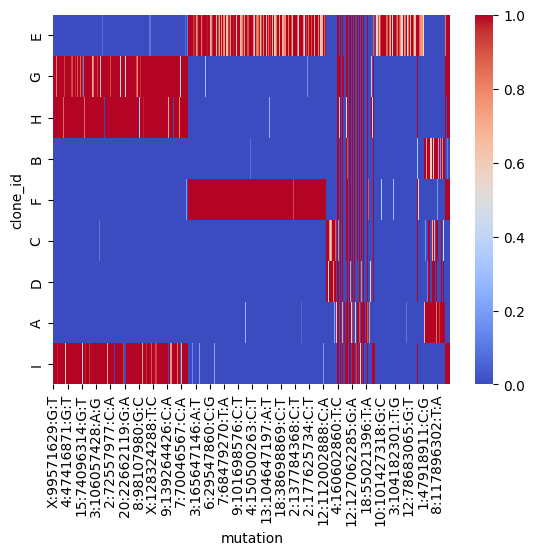

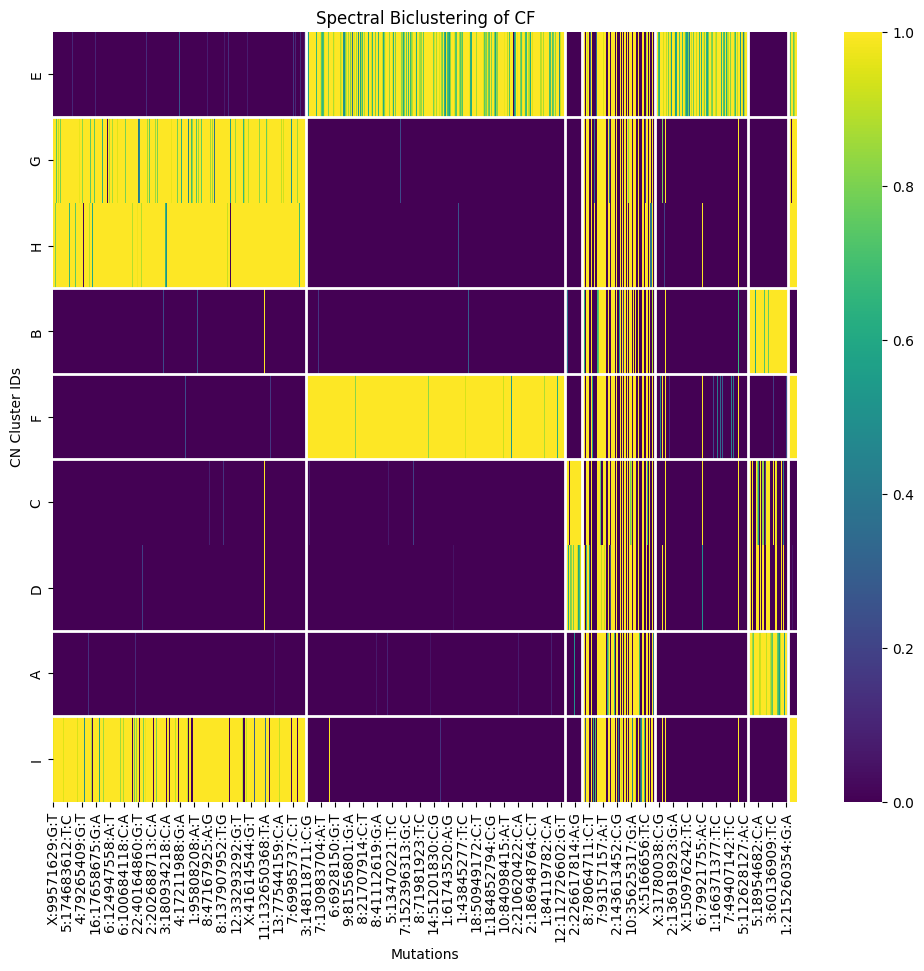

In [52]:
plot_spectral_clustering(F_cononical)

## Formulate constraints of according to chimani

---



## Let's cluster the mutations

In [ ]:
F_cononical

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,10:102329766:C:A,...,X:94344991:T:G,X:96387929:A:T,X:96987846:A:C,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625,0.606061,1.0,1.0,...,1.0,0.0,0.933333,0.0,0.769231,0.095238,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000,0.000000,1.0,1.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000,0.000000,1.0,0.0,...,1.0,1.0,0.000000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000


In [53]:
cluster_ids = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

In [56]:
F_in_clusters = (
    F_cononical.loc[cluster_ids]
    .T
    .reset_index().reset_index()
    .rename(columns={"index": "mutation_id"})
    .set_index(["mutation_id"])
)
F_in_clusters

clone_id,mutation,A,B,C,D,E,F,G,H,I
mutation_id,,,,,,,,,,
0,10:100129846:C:A,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0
1,10:100185101:A:G,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0
2,10:100209326:T:C,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0
3,10:100283942:C:T,0.000000,0.0,0.0,0.0,0.784314,1.0,0.000000,0.0,0.0
4,10:10086005:G:T,0.833333,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8231,X:97564955:T:C,0.000000,0.0,0.0,0.0,0.095238,0.0,1.000000,1.0,1.0
8232,X:98452192:T:C,0.000000,0.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.0
8233,X:98700894:C:T,1.000000,1.0,1.0,1.0,0.952381,1.0,1.000000,1.0,1.0


### Let's first build a graph for each clone

In [107]:
threshold = 0.3

In [108]:
def get_mutations_subclonal_in_cluster(cluster_id):
    F_in_cluster = F_in_clusters[cluster_id]
    F_in_cluster = F_in_cluster[(F_in_cluster > 0) & (F_in_cluster < 1)]
    return F_in_cluster

In [109]:
import networkx as nx


def build_graph_for_cluster(F_cluster, threshold=0.025):

    G = nx.DiGraph()
    mutations = F_cluster.index.tolist()

    G.add_nodes_from(mutations)

    for i in mutations:
        for j in mutations:
            if i <= j:
                continue

            Fi = F_cluster.loc[i]
            Fj = F_cluster.loc[j]
            diff = Fi - Fj

            if abs(diff) < threshold:
                # bidirectional
                G.add_edge(i, j)
                G.add_edge(j, i)
            elif diff > 0:
                # Fi > Fj -> i -> j
                G.add_edge(i, j)
            else:
                # Fj > Fi -> j -> i
                G.add_edge(j, i)

    return G

In [110]:
Fs = {}

for cluster_id in cluster_ids:
    Fs[cluster_id] = get_mutations_subclonal_in_cluster(cluster_id)

In [111]:
Gs = {}

for cluster_id in cluster_ids:
    Gs[cluster_id] = build_graph_for_cluster(Fs[cluster_id], threshold=threshold)

In [112]:
def form_mutation_groups_for_cluster(current_cluster_id, G, rho):

    components = list(nx.strongly_connected_components(G))

    mean_fs = []

    for component in components:
        mutations_in_component = list(component)
        filt = rho[mutations_in_component]

        mean_fs.append(np.mean(filt))

    sorted_index = np.argsort(mean_fs)

    mutation_groups = {}
    for j in sorted_index:
        component = components[j]
        mutations_in_component = list(component)
        for i in range(len(mutations_in_component)):
            mutation_i = mutations_in_component[i]

            other_clone_str = f"{current_cluster_id}_{j:02}_"
            for clone_id in cluster_ids:
                if clone_id != current_cluster_id:
                    rho = F_in_clusters.loc[mutation_i, clone_id]
                    if rho > 0.5: other_clone_str += "1"
                    else: other_clone_str += "0"

            if other_clone_str not in mutation_groups:
                mutation_groups[other_clone_str] = []

            mutation_groups[other_clone_str].append(mutation_i)

    mutation_groups_list = list(mutation_groups.keys())

    G = nx.DiGraph()
    G.add_nodes_from(mutation_groups_list)

    for i in range(len(mutation_groups_list)):
        for j in range(i + 1, len(mutation_groups_list)):
            group_name_i = mutation_groups_list[i]
            group_name_j = mutation_groups_list[j]

            if group_name_i[:4] == group_name_j[:4]:
                G.add_edge(group_name_i, group_name_j)
                G.add_edge(group_name_j, group_name_i)
            elif group_name_i[:4] > group_name_j[:4]:
                G.add_edge(group_name_i, group_name_j)
            else:
                G.add_edge(group_name_j, group_name_i)
    return G, mutation_groups

In [113]:
G_s = {}
mut_grps = {}

for cluster_id in cluster_ids:
    G_s[cluster_id], mut_grps[cluster_id] = form_mutation_groups_for_cluster(cluster_id, Gs[cluster_id], Fs[cluster_id])

In [114]:
for cluster_id in cluster_ids:
    print(cluster_id, len(mut_grps[cluster_id]))

A 16
B 14
C 19
D 19
E 11
F 8
G 15
H 12
I 13


In [115]:
all_known_ids = set()

for cluster_id in cluster_ids:
    all_known_ids.update(mut_grps[cluster_id].keys())

rho_clone_binary = F_in_clusters[~F_in_clusters.index.isin(all_known_ids)]
rho_clone_binary = rho_clone_binary.loc[~(rho_clone_binary[cluster_ids] == 0).all(axis=1)]
rho_clone_binary

clone_id,mutation,A,B,C,D,E,F,G,H,I
mutation_id,,,,,,,,,,
0,10:100129846:C:A,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0
1,10:100185101:A:G,0.000000,0.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0
2,10:100209326:T:C,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0
3,10:100283942:C:T,0.000000,0.0,0.0,0.0,0.784314,1.0,0.000000,0.0,0.0
4,10:10086005:G:T,0.833333,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8231,X:97564955:T:C,0.000000,0.0,0.0,0.0,0.095238,0.0,1.000000,1.0,1.0
8232,X:98452192:T:C,0.000000,0.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.0
8233,X:98700894:C:T,1.000000,1.0,1.0,1.0,0.952381,1.0,1.000000,1.0,1.0


In [116]:
mutations_in_pool = list(rho_clone_binary.index)

mutation_groups = {}

for i in range(len(mutations_in_pool)):
    mutation_i = mutations_in_pool[i]

    other_clone_str = f"P_"
    for cluster_id in cluster_ids:
        F = F_in_clusters.loc[mutation_i, cluster_id]
        if F > 0.5: other_clone_str += "1"
        else: other_clone_str += "0"

    if other_clone_str not in mutation_groups:
        mutation_groups[other_clone_str] = []

    mutation_groups[other_clone_str].append(mutation_i)

mutation_groups = {k: v for k, v in mutation_groups.items() if len(v) > 3}
for k, v in mutation_groups.items():
    print(k, len(v))


P_000011000 2797
P_111111111 362
P_110000000 202
P_000010000 980
P_000000111 2577
P_000011111 68
P_000000001 51
P_000000100 26
P_000001000 70
P_000000110 134
P_000000000 139
P_111100000 188
P_100000000 113
P_000000011 24
P_101111111 15
P_101100000 9
P_001100000 152
P_011100000 6
P_010111111 4
P_110100000 11
P_000000101 45
P_011111111 9
P_011100111 5
P_000111111 4
P_000100000 23
P_111011111 11
P_110111111 12
P_111000000 6
P_111111101 6
P_001000000 12
P_000000010 21
P_000011101 5
P_011111101 4
P_010000000 13
P_001111111 12
P_110011111 6
P_111100111 10


In [117]:
def dict_to_map(d):
    df = pd.DataFrame(
        [(k, v) for k, values in d.items() for v in values],
        columns=["mutation_group", "mutation_id"]
    )
    return df

mut_grps_df = {}

for cluster_id in cluster_ids:
    mut_grps_df[cluster_id] = dict_to_map(mut_grps[cluster_id])

pool_mutations_df = dict_to_map(mutation_groups)

In [118]:
mut_grp_df = pd.concat(list(mut_grps_df.values()) + [pool_mutations_df])
mut_grp_df

,mutation_group,mutation_id
0,A_00_10000000,4
1,A_00_10000000,4106
2,A_00_10000000,6173
3,A_00_10000000,4127
4,A_00_10000000,8222
...,...,...
8127,P_111100111,5324
8128,P_111100111,5345
8129,P_111100111,6951
8130,P_111100111,6989


In [119]:
counts = (
    mut_grp_df.groupby("mutation_group")["mutation_id"]
      .count()
      .reset_index(name="mutation_count")
      .sort_values("mutation_count", ascending=False)
)
counts.sort_values("mutation_group")

,mutation_group,mutation_count
0,A_00_00000000,71
1,A_00_00000111,31
2,A_00_00001000,3
3,A_00_00010000,5
4,A_00_00011000,23
...,...,...
159,P_111011111,11
160,P_111100000,188
161,P_111100111,10
162,P_111111101,6


In [120]:
threshold = 30

counts = mut_grp_df["mutation_group"].value_counts()

valid_groups = counts[counts >= threshold].index

mut_grp_df = mut_grp_df[mut_grp_df["mutation_group"].isin(valid_groups)]

In [121]:
mut_grp_df = pd.merge(mut_grp_df, F_in_clusters, how='left', on='mutation_id')
mut_grp_df

,mutation_group,mutation_id,mutation,A,B,C,D,E,F,G,H,I
0,A_00_10000000,4,10:10086005:G:T,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,A_00_10000000,4106,2:210457758:A:T,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,A_00_10000000,6173,6:114816847:A:G,0.842105,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,A_00_10000000,4127,2:21645019:G:A,0.782609,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,A_00_10000000,8222,X:93127003:G:A,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11697,P_000000101,6986,7:84886718:C:A,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0
11698,P_000000101,7302,8:26957648:G:A,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,1.0
11699,P_000000101,7362,8:4577103:G:A,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0
11700,P_000000101,7442,8:65075701:G:A,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0


In [122]:
counts = (
    mut_grp_df.groupby("mutation_group")["mutation_id"]
      .count()
      .reset_index(name="mutation_count")
      .sort_values("mutation_count", ascending=False)
)
counts.sort_values("mutation_group")

,mutation_group,mutation_count
0,A_00_00000000,71
1,A_00_00000111,31
2,A_00_10000000,78
3,A_00_11100000,40
4,A_00_11111111,42
5,B_00_10000000,77
6,C_00_00100000,40
7,C_00_11100000,35
8,C_00_11111111,33
9,D_00_00100000,53


In [123]:
mutation_group_weights = dict(zip(counts["mutation_group"], counts["mutation_count"]))
mutation_group_weights

{'P_000011000': 2797,
 'P_000000111': 2577,
 'E_00_00001000': 1352,
 'P_000010000': 980,
 'E_00_00000000': 666,
 'G_00_00000011': 371,
 'P_111111111': 362,
 'I_00_00000011': 224,
 'P_110000000': 202,
 'P_111100000': 188,
 'P_001100000': 152,
 'P_000000000': 139,
 'P_000000110': 134,
 'F_00_00001000': 118,
 'H_00_00000011': 115,
 'P_100000000': 113,
 'E_00_00000111': 80,
 'A_00_10000000': 78,
 'B_00_10000000': 77,
 'G_00_00000010': 73,
 'A_00_00000000': 71,
 'P_000001000': 70,
 'P_000011111': 68,
 'I_00_00000000': 57,
 'D_00_00100000': 53,
 'P_000000001': 51,
 'E_00_11111111': 47,
 'D_00_11111111': 46,
 'P_000000101': 45,
 'F_00_00000111': 43,
 'A_00_11111111': 42,
 'A_00_11100000': 40,
 'C_00_00100000': 40,
 'D_00_11100000': 36,
 'C_00_11100000': 35,
 'I_00_00001100': 33,
 'C_00_11111111': 33,
 'G_00_00001100': 32,
 'A_00_00000111': 31,
 'H_00_00000010': 31}

In [124]:
df = mut_grp_df.copy()
mut_grp = df.groupby('mutation_group')[cluster_ids].mean()
F_bar = mut_grp.T

identity_block = pd.DataFrame(
    np.eye(len(F_bar)),
    index=F_bar.index,
    columns=[f"CN_{row}" for row in F_bar.index]
)

F_bar_cn = pd.concat([F_bar, identity_block], axis=1)

F_bar_cn

,A_00_00000000,A_00_00000111,A_00_10000000,A_00_11100000,A_00_11111111,B_00_10000000,C_00_00100000,C_00_11100000,C_00_11111111,D_00_00100000,...,P_111111111,CN_A,CN_B,CN_C,CN_D,CN_E,CN_F,CN_G,CN_H,CN_I
A,0.645361,0.093641,0.721383,0.812575,0.741829,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.976097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.000000,0.000000,1.000000,1.000000,1.000000,0.660334,0.000000,1.000000,1.000000,0.000000,...,0.990041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.695001,0.679652,0.799002,1.000000,...,0.986281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.739406,...,0.973161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.980698,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
F,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.999681,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
G,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.998075,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
H,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.997895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
I,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.995432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
F_binarized = F_bar.map(lambda x: 1 if x == 1 else 0)
F_binarized_cn = F_bar_cn.map(lambda x: 1 if x == 1 else 0)
F_binarized_cn

,A_00_00000000,A_00_00000111,A_00_10000000,A_00_11100000,A_00_11111111,B_00_10000000,C_00_00100000,C_00_11100000,C_00_11111111,D_00_00100000,...,P_111111111,CN_A,CN_B,CN_C,CN_D,CN_E,CN_F,CN_G,CN_H,CN_I
A,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
B,0,0,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
C,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
D,0,0,0,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
E,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
F,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
G,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
H,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
I,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [126]:
p = F_bar.shape[0]
m = F_bar.shape[1]
n = m + p
m , n, p

(40, 49, 9)

In [127]:
import numpy as np
from collections import defaultdict
import gurobipy as gp
from gurobipy import Model, GRB, quicksum

In [128]:
params = {
    "WLSACCESSID": '85dfeec1-65a1-402f-9425-7465d0f3a229',
    "WLSSECRET": 'f755a3a4-dba0-444d-8bc8-d8e781d8a05c',
    "LICENSEID": 2687964,
}
env = gp.Env(params=params)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd


In [129]:
mutations = list(F_bar.columns)
mutations_cn = list(F_bar_cn.columns)
mutations_cn_only = mutations_cn[m:]

In [130]:
# --- Build MILP in gurobipy ---
mdl = Model("CNCFF", env=env)

x_vars = {}
for mut in mutations:
    x_vars[mut] = mdl.addVar(vtype=GRB.BINARY, name=f"x_{mut}")
    x_vars[mut].start = 0

In [131]:
b_vars = {}
for i in mutations:
    for j in mutations:
        b_vars[i, j] = mdl.addVar(vtype=GRB.BINARY, name=f"b_{i}_{j}")

for i in mutations_cn_only:
    for j in mutations:
        b_vars[i, j] = mdl.addVar(vtype=GRB.BINARY, name=f"b_{i}_{j}")

In [132]:
u_vars = {(i, k): mdl.addVar(lb=0, ub=1, vtype=GRB.CONTINUOUS, name=f"u_{i}_{k}") for i in cluster_ids for k in mutations}

for u in u_vars.values():
    u.PoolIgnore = 1

In [133]:
g_vars = {(i, j): mdl.addVar(vtype=GRB.BINARY, name=f"g_{i}_{j}")for i in cluster_ids for j in mutations}

for g in g_vars.values():
    g.PoolIgnore = 1

In [134]:
a_vars = {}
for i in cluster_ids:
    for k in mutations:
        for j in mutations:
            a_vars[i, k, j] = mdl.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"a_{i}_{k}_{j}")

for a in a_vars.values():
    a.PoolIgnore = 1
len(a_vars)

14400

In [135]:
f_vars = {(i, j): mdl.addVar(vtype=GRB.CONTINUOUS, name=f"f_{i}_{j}") for i in cluster_ids for j in mutations}
len(f_vars)

for f in f_vars.values():
    f.PoolIgnore = 1

In [136]:
# bounds
import numpy as np

epsilon = 0.00

f_tilde = {}
f_low = {}
f_high = {}

for cluster_id in cluster_ids:
    for mutation in mutations:
        F = mut_grp.loc[mutation, cluster_id]
        f_tilde[(cluster_id, mutation)] = F
        f_low[(cluster_id, mutation)] = np.clip(F - epsilon, 0.0, 1.0)
        f_high[(cluster_id, mutation)] = np.clip(F + epsilon, 0.0, 1.0)

print("f_tilde:", f_tilde)
print("f_low:", f_low)
print("f_high:", f_high)

f_tilde: {('A', 'A_00_00000000'): np.float64(0.6453611761700331), ('A', 'A_00_00000111'): np.float64(0.09364070006679878), ('A', 'A_00_10000000'): np.float64(0.7213827977725059), ('A', 'A_00_11100000'): np.float64(0.8125749986493821), ('A', 'A_00_11111111'): np.float64(0.7418287667902513), ('A', 'B_00_10000000'): np.float64(1.0), ('A', 'C_00_00100000'): np.float64(0.0), ('A', 'C_00_11100000'): np.float64(1.0), ('A', 'C_00_11111111'): np.float64(1.0), ('A', 'D_00_00100000'): np.float64(0.0), ('A', 'D_00_11100000'): np.float64(1.0), ('A', 'D_00_11111111'): np.float64(1.0), ('A', 'E_00_00000000'): np.float64(0.0), ('A', 'E_00_00000111'): np.float64(0.0), ('A', 'E_00_00001000'): np.float64(0.0), ('A', 'E_00_11111111'): np.float64(1.0), ('A', 'F_00_00000111'): np.float64(0.0), ('A', 'F_00_00001000'): np.float64(0.0), ('A', 'G_00_00000010'): np.float64(0.0), ('A', 'G_00_00000011'): np.float64(0.0), ('A', 'G_00_00001100'): np.float64(0.0), ('A', 'H_00_00000010'): np.float64(0.0), ('A', 'H_00_

In [137]:
# (1)
for i in cluster_ids:
    for k in mutations:
        for j in mutations:
            mdl.addConstr(a_vars[i, k, j] <= u_vars[i, k], name=f"a[{i}][{k}][{j}] <= u[{i}][{k}]")
            mdl.addConstr(a_vars[i, k, j] <= b_vars[k, j], name=f"a[{i}][{k}][{j}] <= b[{k}][{j}]")
            mdl.addConstr(a_vars[i, k, j] >= u_vars[i, k] + b_vars[k, j] - 1, name=f"a[{i}][{k}][{j}] >= u[{i}][{k}] + b[{k}][{j}]")

In [138]:
# (1)
for i in cluster_ids:
    for j in mutations:
        mdl.addConstr(f_vars[i, j] == quicksum(a_vars[i, k, j] for k in mutations))

In [139]:
# (2)
for i in cluster_ids:
    for j in mutations:
        mdl.addConstr(f_vars[i, j] >= f_low[i, j] * x_vars[j], name=f"f[{i}][{j}] >= f_low[{i}][{j}] * x[{j}]")
        mdl.addConstr(f_vars[i, j] <= f_high[i, j] * x_vars[j], name=f"f[{i}][{j}] <= f_high[{i}][{j}] * x[{j}]")

In [140]:
# (3)
for cluster_id in cluster_ids:
    mdl.addConstr(quicksum(u_vars[cluster_id, mutation] for mutation in mutations) == 1)

In [141]:
# (4)
for i in mutations:
    for j in mutations:
        if i == j:
            mdl.addConstr(b_vars[i,j] == x_vars[i], name=f"b[{i}][{j}] = x[{i}]") # TODO: remove
        else:
            mdl.addConstr(b_vars[i,j] <= x_vars[i], name=f"b[{i}][{j}] <= x[{i}]")
            mdl.addConstr(b_vars[j,i] <= x_vars[i], name=f"b[{j}][{j}] <= x[{i}]") # TODO: remove

for i in cluster_ids:
    for j in mutations:
        mdl.addConstr(f_vars[i,j] <= x_vars[j], name=f"f[{i}][{j}] = x[{j}]")

In [142]:
# (5)
for j in mutations:
    mdl.addConstr(quicksum(g_vars[i, j] for i in cluster_ids) <= p - (p - 1) * x_vars[j], name=f"g[{i}][{j}] <= p - (p - 1) * x[{j}]")

In [143]:
# (6)
for i in cluster_ids:
    for j in mutations:
        if f_low[i, j] == 0:
            mdl.addConstr(f_vars[i, j] <= g_vars[i, j], name=f"f[{i}][{j}] <= g[{i}][{j}]")
        elif f_high[i, j] == 1:
            mdl.addConstr(f_vars[i, j] >= 1 - g_vars[i, j], name=f"f[{i}][{j}] >= 1 - g[{i}][{j}]")
        else:
            g_vars[i, j] = 1

In [144]:
# (7)
# for i in mutations_cn_only:
#     for j in mutations:
#         if F_binarized_cn.loc[i[3:], j] == 1:
#             mdl.addConstr(b_vars[i, j] == x_vars[j], name=f"b[{i}][{j}] = x[{j}]")

for i in mutations_cn_only:
    cluster_id = i[3:]
    for j in mutations:
        mdl.addConstr(b_vars[i, j] <= f_vars[cluster_id, j], name=f"b[{i}][{j}] <= f[{cluster_id}][{j}]")
        mdl.addConstr(b_vars[i, j] <= 1 - g_vars[cluster_id, j], name=f"b[{i}][{j}] <= 1 - g[{cluster_id}][{j}]")
        mdl.addConstr(b_vars[i, j] >= f_vars[cluster_id, j] - g_vars[cluster_id, j], name=f"b[{i}][{j}] >= f[{cluster_id}][{j}] - g[{cluster_id}][{j}]")

In [145]:
# (8)
y_vars = {(c,d): mdl.addVar(vtype=GRB.BINARY, name=f"y_{c}_{d}") for c in mutations_cn for d in mutations_cn}
z_vars = {(c,d): mdl.addVar(vtype=GRB.BINARY, name=f"z_{c}_{d}") for c in mutations_cn for d in mutations_cn}

In [146]:
for y in y_vars.values():
    y.PoolIgnore = 1

for z in z_vars.values():
    z.PoolIgnore = 1

In [147]:
for j in mutations_cn:
    for c in mutations:
        for d in mutations:
            if c != d:
                # b_{jc} <= b_{jd} + (1 - y_{cd})
                mdl.addConstr(b_vars[j, c] <= b_vars[j, d] + (1 - y_vars[c,d]))

                # y_{cd} + y_{dc} + z_{cd} >= 1
                mdl.addConstr(y_vars[c,d] + y_vars[d,c] + z_vars[c,d] >= 1)

                if c < d:
                    # b_{jc} + b_{jd} <= 2 - z_{cd}
                    mdl.addConstr(b_vars[j, c] + b_vars[j, d] <= 2 - z_vars[c,d])

In [148]:
mdl.update()
mdl

<gurobi.Model MIP instance CNCFF: 240275 constrs, 22282 vars, Parameter changes: LicenseID=2687964>

In [149]:
# mdl.setObjective(quicksum(x_vars[mut] * mutation_group_weights[mut] for mut in mutations), GRB.MAXIMIZE)
mdl.setObjective(quicksum(x_vars[mut] for mut in mutations), GRB.MAXIMIZE)

In [150]:
mdl.Params.TimeLimit = 600
mdl.Params.PoolSearchMode = 2
mdl.Params.PoolSolutions = 10

mdl.Params.SolutionTarget

mdl.optimize()

Set parameter TimeLimit to value 600
Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 10
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  600
PoolSearchMode  2

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 240275 rows, 22282 columns and 700534 nonzeros
Model fingerprint: 0x21fc3365
Variable types: 15120 continuous, 7162 integer (7162 binary)
Coefficient statistics:
  Matrix range     [3e-04, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]

User MIP start produced solution with objective -0 (0.09s)
Loaded user MIP start with objective -0

Presolve removed 123356 rows and 11455 columns
Presolve time: 0.83s
Presolved: 116919 rows, 10827 columns, 364048 nonzeros
Var

In [151]:
nSolutions = mdl.SolCount
print("Number of solutions found:", nSolutions)
unique_sols = []

for i in range(nSolutions):
    mdl.setParam(GRB.Param.SolutionNumber, i)
    b_vars_val = tuple(b_vars[muti, mutj].Xn for muti in mutations_cn for mutj in mutations)
    if b_vars_val not in unique_sols:
        unique_sols.append(b_vars_val)
        obj_val = mdl.PoolObjVal
        print(f"Solution {i}: Obj={obj_val}")


Number of solutions found: 10
Solution 0: Obj=7.0
Solution 1: Obj=7.0
Solution 2: Obj=7.0
Solution 3: Obj=6.0
Solution 4: Obj=5.0
Solution 5: Obj=5.0
Solution 6: Obj=5.0
Solution 7: Obj=4.0
Solution 8: Obj=2.0
Solution 9: Obj=2.0


In [152]:
solution_i = 2
mdl.setParam(GRB.Param.SolutionNumber, solution_i)

In [153]:
B_df = pd.DataFrame(index=mutations_cn, columns=mutations)

for i in mutations_cn:
    for j in mutations:
        if b_vars[i,j].Xn is not None:
          B_df.loc[i, j] = b_vars[i,j].Xn

# Optional: convert to numeric type
B_df = B_df.astype(int)

B = B_df.to_numpy()

print("   ", end="")
for i in range(B.shape[1]):
    if i < 10: print(f"{i}", end=" ")
    else: print(f"{i}", end="")
print()

for i in range(B.shape[0]):
    if i < 10: print(i, end="  ")
    else: print(i, end=" ")

    for j in range(B.shape[1]):
        print(B[i][j], end=" ")
    print()

   0 1 2 3 4 5 6 7 8 9 101112131415161718192021222324252627282930313233343536373839
0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
2  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
3  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
4  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
5  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
6  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
7  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
8  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
9  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

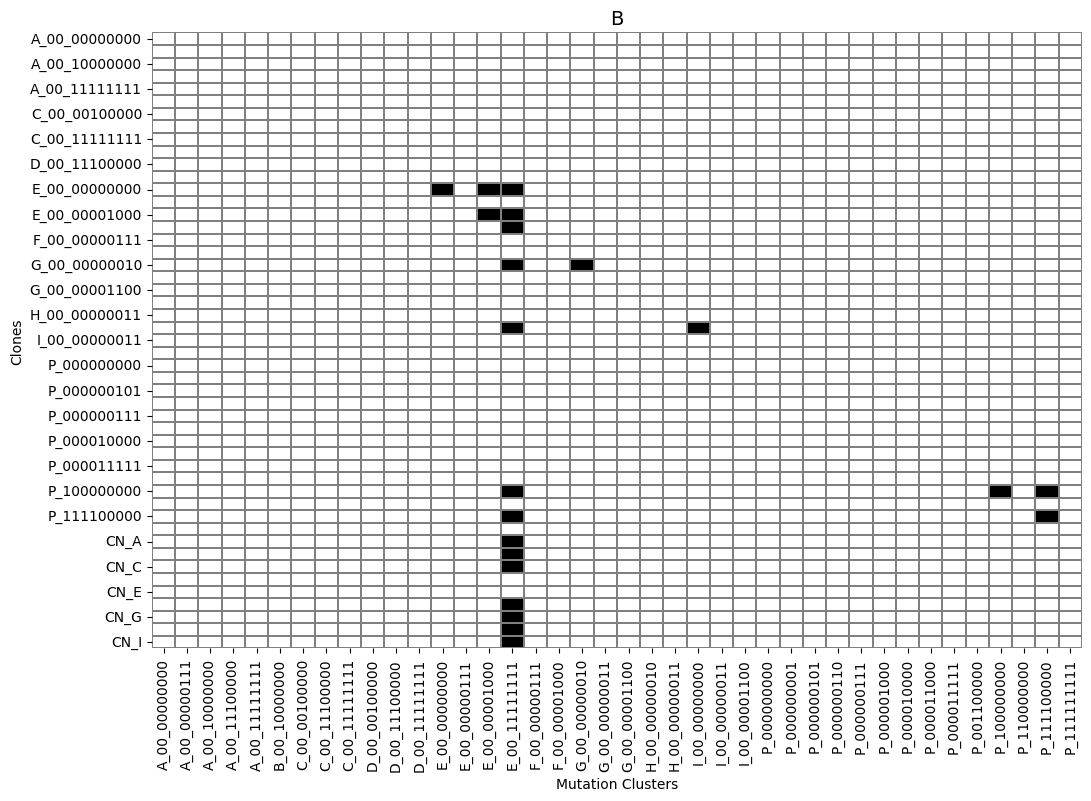

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(B_df,
            cmap=sns.color_palette(["white", "black"]),  # 0=white, 1=green
            cbar=False,
            linewidths=0.2,
            linecolor="grey")

plt.title("B", fontsize=14)
plt.xlabel("Mutation Clusters")
plt.ylabel("Clones")
plt.show()


In [155]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

def build_phylogeny(X, mutations):
    G = nx.DiGraph()
    root = "root"
    G.add_node(root, label="root")

    taxa_sets = []
    for i, row in enumerate(X):
        if not row.any():
            continue
        chars = frozenset([j for j, val in enumerate(row) if val == 1])
        taxa_sets.append((i, chars))

    sorted_taxa_sets = sorted_list = sorted(taxa_sets, key=lambda x: len(x[1]))
    node_map = {frozenset(): root}

    for i, s in sorted_taxa_sets:
        parent = max([p for p in node_map if p.issubset(s)], key=len)
        parent_name = node_map[parent]

        diff = s - parent  # mutations gained at this node
        mut_diffs = [mutations[j] for j in sorted(diff)]
        edge_name = "\n".join(mut_diffs) if mut_diffs else "empty"
        node_name = f"{mutations[i]} [{i}]"

        G.add_node(node_name, label=node_name)
        G.add_edge(parent_name, node_name, label=edge_name)

        node_map[s] = node_name

    return G


T = build_phylogeny(B, mutations_cn)

In [156]:
# !sudo apt-get install graphviz graphviz-dev
# !pip install pygraphviz

In [165]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches



def draw_clone_tree(T):

    # Create labels with concise formatting
    labels = {node: str(node) for node in T.nodes()}

    # Use graphviz 'dot' layout for hierarchical structure
    pos = nx.nx_agraph.graphviz_layout(T, prog="dot", args="-Gnodesep=.5 -Granksep=50")

    # Define a color map by first letter
    color_map = {
        'A': 'red',
        'B': 'blue',
        'C': 'green',
        'D': 'orange',
        'E': 'purple',
        'F': 'yellow',
        'G': 'brown',
        'H': 'salmon',
    }

    # Assign colors to nodes based on first letter (default: gray if unknown)

    def weighted_color_mix(usage, color_map):
        # Normalize weights so they sum to 1
        weights = usage.values.astype(float)
        if weights.sum() == 0:
            return "#cccccc"  # fallback color for all-zero
        weights = weights / weights.sum()

        # Convert named colors to RGB (0–1 scale)
        rgb_colors = np.array([mcolors.to_rgb(color_map[k]) for k in usage.index])

        # Weighted average of RGB channels
        mixed_rgb = np.average(rgb_colors, axis=0, weights=weights)

        # Convert back to hex
        return mcolors.to_hex(mixed_rgb)

    def get_node_color(node_name):
        if node_name == "root":
            return "grey"
        if node_name.startswith("CN_"):
            return color_map.get(node_name[3], "gray")

        if node_name.startswith("P_"): mutation_name = node_name[:10]
        else: mutation_name = node_name[:12]
        usage = U_df[mutation_name]
        color =  weighted_color_mix(usage, color_map)
        return color


    node_colors = [get_node_color(str(node)) for node in T.nodes()]

    # Create figure with adjusted size
    plt.figure(figsize=(12, 8))

    # Draw the tree with node colors
    nx.draw(
        T,
        pos,
        labels=labels,
        font_size=10,
        font_weight="bold",
        node_size=3000,
        edge_color="#555555",
        width=1.5,
        arrows=True,
        node_color=node_colors
    )

    # Add title and adjust layout
    legend_patches = [
        mpatches.Patch(color=color, label=label)
        for label, color in color_map.items()
    ]

    plt.legend(handles=legend_patches, title="CN Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.title("Phylogenetic Clone Tree", fontsize=12, pad=0)
    plt.tight_layout()
    plt.show()


draw_clone_tree(T)

KeyError: 'E_00_1111111'

In [159]:
F_df = pd.DataFrame(index=cluster_ids, columns=mutations)

for i in cluster_ids:
    for j in mutations:
        F_df.loc[i, j] = f_vars[i,j].X

F_df.to_csv("F_model.csv")
F_df

,A_00_00000000,A_00_00000111,A_00_10000000,A_00_11100000,A_00_11111111,B_00_10000000,C_00_00100000,C_00_11100000,C_00_11111111,D_00_00100000,...,P_000000111,P_000001000,P_000010000,P_000011000,P_000011111,P_001100000,P_100000000,P_110000000,P_111100000,P_111111111
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.875681,0.0,0.965441,0.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.051396,0.0,0.97728,0.0
C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971647,0.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003726,0.0,0.957328,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001013,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001106,0.0,0.004375,0.0


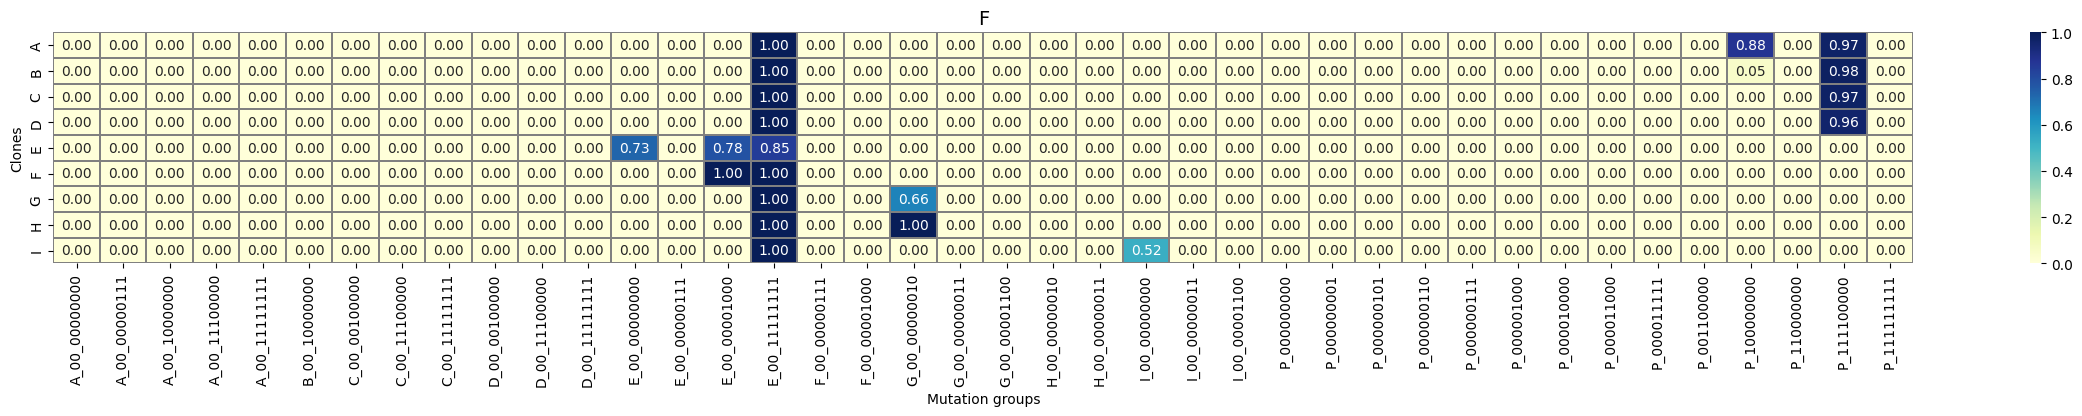

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,3))

sns.heatmap(F_df.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("F", fontsize=14)
plt.xlabel("Mutation groups")
plt.ylabel("Clones")
plt.show()


In [161]:
U_df = pd.DataFrame(index=cluster_ids, columns=mutations)

for i in cluster_ids:
    for j in mutations:
        if i == j: U_df.loc[i, j] = 1
        else: U_df.loc[i, j] = u_vars[i,j].X

U_df.to_csv("U.csv")
U_df

,A_00_00000000,A_00_00000111,A_00_10000000,A_00_11100000,A_00_11111111,B_00_10000000,C_00_00100000,C_00_11100000,C_00_11111111,D_00_00100000,...,P_000000111,P_000001000,P_000010000,P_000011000,P_000011111,P_001100000,P_100000000,P_110000000,P_111100000,P_111111111
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.875681,0.0,0.08976,0.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.051396,0.0,0.925884,0.0
C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971647,0.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003726,0.0,0.953602,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001013,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001106,0.0,0.003269,0.0


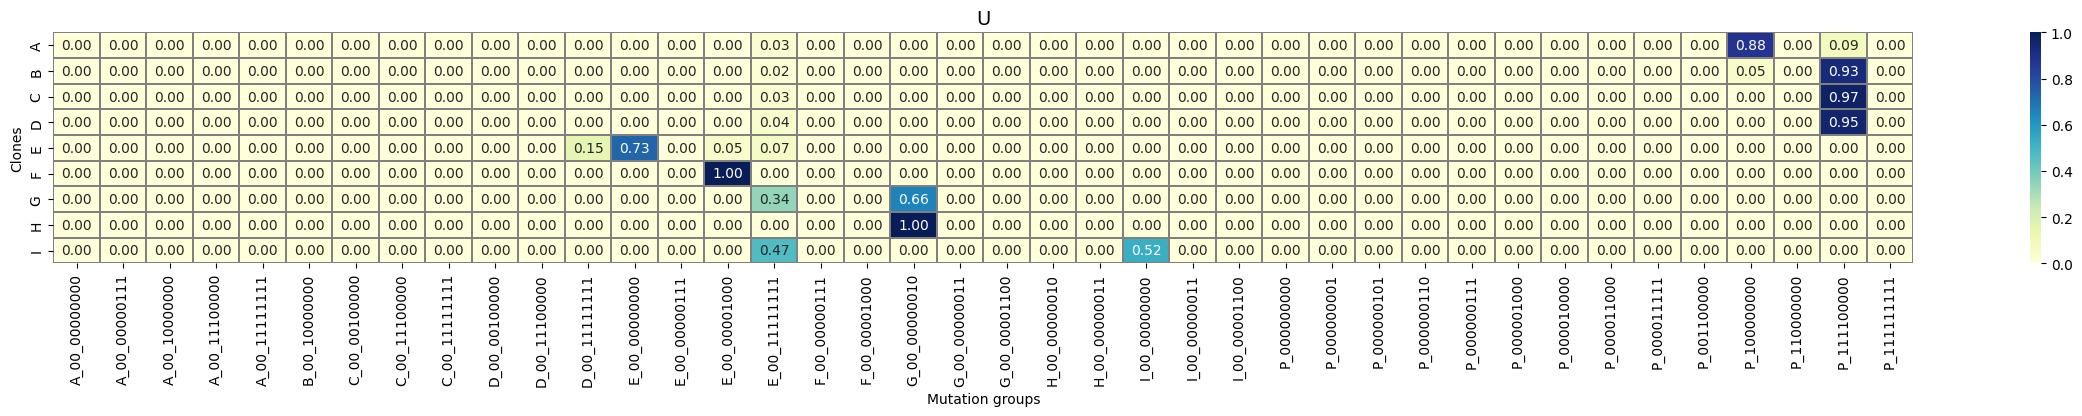

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,3))

sns.heatmap(U_df.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("U", fontsize=14)
plt.xlabel("Mutation groups")
plt.ylabel("Clones")
plt.show()

In [163]:
B_df = pd.DataFrame(index=mutations_cn, columns=mutations)

for i in mutations_cn:
    for j in mutations:
        B_df.loc[i, j] = b_vars[i,j].X

B_df.to_csv("B.csv")
B_df


,A_00_00000000,A_00_00000111,A_00_10000000,A_00_11100000,A_00_11111111,B_00_10000000,C_00_00100000,C_00_11100000,C_00_11111111,D_00_00100000,...,P_000000111,P_000001000,P_000010000,P_000011000,P_000011111,P_001100000,P_100000000,P_110000000,P_111100000,P_111111111
A_00_00000000,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
A_00_00000111,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A_00_10000000,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
A_00_11100000,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A_00_11111111,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
B_00_10000000,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
C_00_00100000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
C_00_11100000,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
C_00_11111111,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
D_00_00100000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0


In [164]:
x_vars

{'A_00_00000000': <gurobi.Var x_A_00_00000000 (value 0.0)>,
 'A_00_00000111': <gurobi.Var x_A_00_00000111 (value 0.0)>,
 'A_00_10000000': <gurobi.Var x_A_00_10000000 (value 0.0)>,
 'A_00_11100000': <gurobi.Var x_A_00_11100000 (value 0.0)>,
 'A_00_11111111': <gurobi.Var x_A_00_11111111 (value 0.0)>,
 'B_00_10000000': <gurobi.Var x_B_00_10000000 (value 0.0)>,
 'C_00_00100000': <gurobi.Var x_C_00_00100000 (value 0.0)>,
 'C_00_11100000': <gurobi.Var x_C_00_11100000 (value 0.0)>,
 'C_00_11111111': <gurobi.Var x_C_00_11111111 (value 0.0)>,
 'D_00_00100000': <gurobi.Var x_D_00_00100000 (value 0.0)>,
 'D_00_11100000': <gurobi.Var x_D_00_11100000 (value 0.0)>,
 'D_00_11111111': <gurobi.Var x_D_00_11111111 (value 0.0)>,
 'E_00_00000000': <gurobi.Var x_E_00_00000000 (value 1.0)>,
 'E_00_00000111': <gurobi.Var x_E_00_00000111 (value 0.0)>,
 'E_00_00001000': <gurobi.Var x_E_00_00001000 (value 1.0)>,
 'E_00_11111111': <gurobi.Var x_E_00_11111111 (value 1.0)>,
 'F_00_00000111': <gurobi.Var x_F_00_000

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_clone_tree(T):

    # Create labels with concise formatting
    labels = {node: str(node) for node in T.nodes()}

    # Use graphviz 'dot' layout for hierarchical structure
    pos = nx.nx_agraph.graphviz_layout(T, prog="dot", args="-Gnodesep=.5 -Granksep=50")

    # Define a color map by first letter
    color_map = {
        'A': 'red',
        'B': 'blue',
        'C': 'green',
        'D': 'orange',
        'E': 'purple',
    }

    # Assign colors to nodes based on first letter (default: gray if unknown)
    node_colors = [
        color_map.get(str(node)[0], "gray") for node in T.nodes()
    ]

    # Create figure with adjusted size
    plt.figure(figsize=(12, 8))

    # Draw the tree with node colors
    nx.draw(
        T,
        pos,
        labels=labels,
        font_size=7,
        font_weight="bold",
        node_size=1000,
        edge_color="#555555",
        width=1.5,
        arrows=True,
        node_color=node_colors
    )

    # Add title and adjust layout
    plt.title("Phylogenetic Clone Tree", fontsize=12, pad=0)
    plt.tight_layout()
    plt.show()
